[153. 487. 314. 483. 432.  87. 183. 141. 236.  86. 319. 218. 232.  53.
 374. 444. 483. 331. 166.   2. 116. 277.  84. 490. 465. 489. 399. 248.
 154.  77. 257.  12. 345. 339.  92.  56. 402. 401. 490. 262. 164.  50.
 393. 402. 406. 293. 298. 207.   2. 492.] [368.   2. 262.  64.  39. 121. 128. 301. 375. 118. 418. 384. 186. 115.
 320. 333. 138. 436. 224. 376. 103. 175. 324. 431. 337. 239.  72. 491.
 197. 152.  53. 385. 322.  72. 362. 279. 164. 310. 405. 233.  56. 224.
 195. 267. 285. 490.  54.  26. 235. 374.]


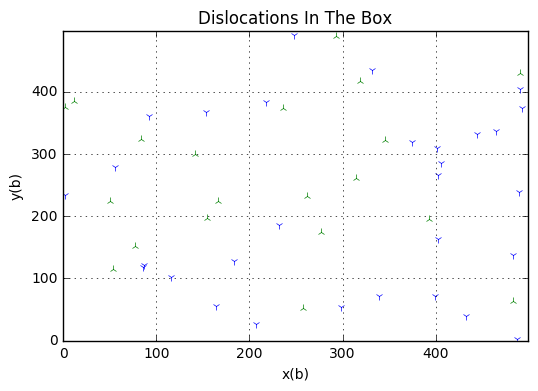

In [34]:
import matplotlib.pyplot as plt
import numpy as np

#PRINTING THE DISLOCATION POSITIONS
def print_dis():
    print(x_dis, y_dis)
    

#CAUTION, SOME FORMULAE GIVEN IN THE THESIS NEED TO BE RECHECKED - STRESS FIELD AND THE VELOCITY PROFILE
#GRID GENERATION

#Grid size in terms of Burger's vector, Burger's vector = 1unit in the x-direction
#The grid is a sqaure
grid_size = 500

#Finding out the grid coordinates
x_coord = np.linspace(0, grid_size - 1, grid_size)
y_coord = x_coord
#print(y_coord)

#GENERATING THE DISLOCATIONS

#Number of disclocations = num_dis
num_dis = 50

#Dislocations identity = (x, y ,s); where s can be +1 or -1 DEFINED GLOBALLY. THE COORDINATES OF THE DISLOCATIONS ARE UPDATED 
#GLOBALLY
s = [1, -1]
x_dis = np.random.choice(x_coord, num_dis)
y_dis = np.random.choice(y_coord, num_dis)
s_dis = np.random.choice(s, num_dis)
print_dis()

#PLOTTING FUNCTION
def plot_dis():
    #Plotting the dislocations
    plt.axis([0, grid_size - 1, 0, grid_size - 1])
    plt.xlabel('x(b)')
    plt.ylabel('y(b)')
    plt.title('Dislocations In The Box')
    plt.grid(True)

    for i in range(len(s_dis)):
        if s_dis[i] == 1:
            plt.plot(x_dis[i], y_dis[i], 'g2')
        
        else:
            plt.plot(x_dis[i], y_dis[i], 'b1')
    plt.show()

"""
ON HOLD
#ANNIHILATION FUNCTION
#The dislocations will be annihilated if the distance between them is strictly less than the length of the burger's vector

def annhilate(b):
    for i in range(len(x_dis))
a = [1, 2, 3, 4]
del(a[1]
"""    
plot_dis()

In [35]:
#STRESS FIELD AT A PARTICULAR POINT


#The function evaluates the stress field at a point in the box. It takes the position of the dislocation(xd, yd) whose stress at a 
#point(x, y) has to be calculated. Burger's vector is kept as 1. Stress is measured in terms of meu/(2*pi*(1-v)). 
#Time is measured in terms of 2*pi*(1-neu)/(meu * mobi * burgers)
def stress_field(x_d, y_d, x, y):
    stress = 1 * np.sin(2 * np.pi * (x - x_d)/grid_size) * (np.cosh(2 * np.pi * (y - y_d)/grid_size) - np.cos(2 * np.pi * (x - x_d)/grid_size) - 
                                                           (2 * np.pi * (y - y_d)/grid_size) * np.sinh(2 * np.pi * (y - y_d)/grid_size))/((np.cosh(2 * np.pi * (y - y_d)/grid_size) - np.cos(2 * np.pi * (x - x_d)/grid_size)) ** 2 * grid_size)
    
    return stress
    
#CALCULATING THE 

In [36]:
#CALCULATING THE VELOCITY OF EACH DISLOCATION

#No climbing, just gliding

#The following function calculates the velocity of dislocation(x, y), z = s_dis(x,y)
def vel_dis(x, y, z, stress_external):
    sum_inter = 0 
    for i in range(len(s_dis)):
        if x == x_dis[i] and y == y_dis[i]:
            continue
        else:
            sum_inter = sum_inter + stress_field(x_dis[i], y_dis[i], x, y) * s_dis[i]
    sum_inter = sum_inter + stress_external
    #Burgers vector value is 1
    return(z * sum_inter)

#NEW LOCATION OF THE DISLOCATION

#Units of timestep are 2 * pi * (1 - neu)/(meu * mobi * Burger). Timestep thus I am taking is 1000
def new_location_and_strain():
    strain_matrix = 0
    for i in range(len(s_dis)):
        dummy = vel_dis(x_dis[i], y_dis[i], s_dis[i], 1) * 1 
        strain_matrix = dummy + strain_matrix
        #modulo introduces periodicity
        x_dis[i] = (x_dis[i] + dummy) % grid_size
    strain_matrix = strain_matrix/(grid_size ** 2)
    #print(strain_matrix)
    return strain_matrix


#LOCATION AFTER "t" TIMESTEPS
def location_after_t(t):
    strain = [0] * t
    for j in range(t):
        strain[j] = new_location_and_strain()
    return strain



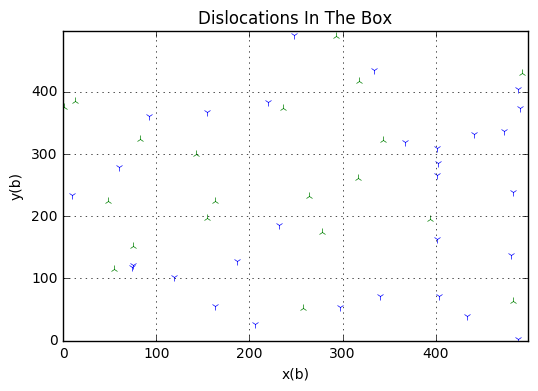

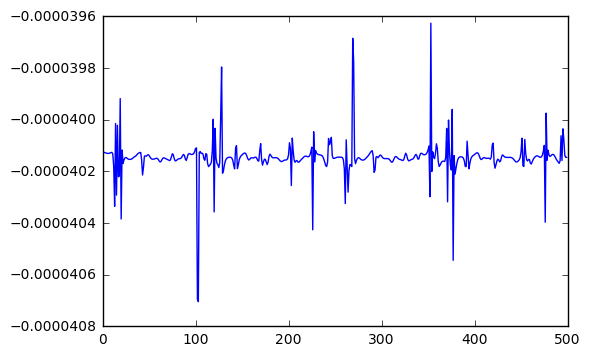

In [37]:
strain = location_after_t(50)
plot_dis()
plt.plot(strain)
plt.show()

###### print_dis()
plot_dis()